# Chapter 4: メトロポリス法

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
np.random.seed(24)

4.2 期待値の計算の具体例

In [45]:
def main():
    n_iter = 10**5
    step_size = 1/2
    
    xs = []
    x = 0
    n_accept = 0

    for i in range(1, n_iter+1):
        backup_x = x

        # S(x) = (x^2)/2
        action_init = 1/2*(x**2)
        
        # dx ~ Uniform(-step_size, step_size)
        dx = np.random.rand()
        dx = (dx-1/2)*step_size*2
        
        x += dx
        
        # S(x') = (x'^2)/2
        action_fin=1/2*(x**2) 
        
        # メトロポリステスト
        metropolis = np.random.rand()
        if np.exp(action_init-action_fin) > metropolis:
            # 受理
            n_accept+= 1
        else:
            # 棄却
            x = backup_x
        xs.append(x)
        
    return xs
xs = main()   

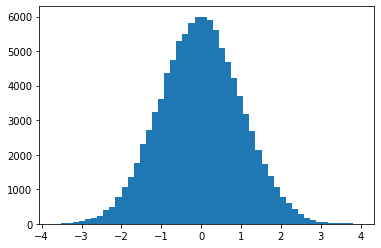

In [46]:
plt.hist(xs, bins=50);

4.4 ガウス分布以外の例

In [49]:
def main():
    n_iter = 10**6
    step_size = 1/2
    
    xs = []
    x = 0
    n_accept = 0

    for i in range(1, n_iter+1):
        backup_x = x

        action_init = -np.log(np.exp(-1/2*(x-3)*(x-3))
                                              + np.exp(-1/2*(x+3)*(x+3)))
        
        # dx ~ Uniform(-step_size, step_size)
        dx = np.random.rand()
        dx = (dx-1/2)*step_size*2
        
        x += dx
        
        action_fin=-np.log(np.exp(-1/2*(x-3)*(x-3))
                                              + np.exp(-1/2*(x+3)*(x+3)))
        
        # メトロポリステスト
        metropolis = np.random.rand()
        if np.exp(action_init-action_fin) > metropolis:
            # 受理
            n_accept+= 1
        else:
            # 棄却
            x = backup_x
        xs.append(x)

    return xs
xs = main()   

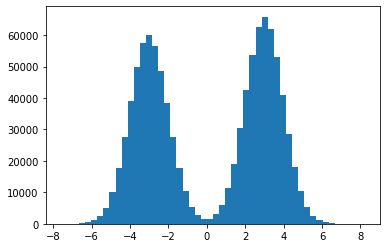

In [50]:
plt.hist(xs, bins=50);